# 서울시 유동 인구

선 그래프, 지도 그래프로 시각화

2. 5월부터 7월 까지의 유동량을 분석

    - 요일별 / 시간별 로 나눠서 시각화

In [1]:
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
df3 = pd.read_csv('../input/Floating_Population_2003.csv')
df4 = pd.read_csv('../input/Floating_Population_2004.csv')
df5 = pd.read_csv('../input/Floating_Population_2005.csv')
df6 = pd.read_csv('../input/Floating_Population_2006.csv')
df7 = pd.read_csv('../input/Floating_Population_2007.csv')

df_all = pd.concat([df5, df6, df7])
# df_all = pd.concat([df7])
df_all.head()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200501,1,20,남성,서울,중구,12000
1,20200501,1,20,여성,서울,은평구,28680
2,20200501,1,50,남성,서울,관악구,34470
3,20200501,1,50,여성,서울,강북구,26500
4,20200501,1,70,여성,서울,은평구,24120


# 요일별 유동인구 분석

In [3]:
df = df_all[['일자', '군구', '유동인구수']]

df['날짜'] = df['일자'].apply(lambda x : str(x)[:4] + "-" + str(x)[4:6] + "-" + str(x)[6:8])
df['월'] = df['일자'].apply(lambda x : str(x)[5])
df.drop(['일자'], axis=1, inplace=True)

df['날짜'] = pd.to_datetime(df['날짜'])

df.head()

C:\Users\wjdwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wjdwl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\wjdwl\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

,군구,유동인구수,날짜,월
0,중구,12000,2020-05-01,5
1,은평구,28680,2020-05-01,5
2,관악구,34470,2020-05-01,5
3,강북구,26500,2020-05-01,5
4,은평구,24120,2020-05-01,5


In [4]:
df = df[['날짜', '유동인구수']]
df['요일'] = df['날짜'].dt.day_name()
df['week'] = df['날짜'].dt.dayofweek
df

,날짜,유동인구수,요일,week
0,2020-05-01,12000,Friday,4
1,2020-05-01,28680,Friday,4
2,2020-05-01,34470,Friday,4
3,2020-05-01,26500,Friday,4
4,2020-05-01,24120,Friday,4
...,...,...,...,...
223195,2020-07-31,29360,Friday,4
223196,2020-07-31,32900,Friday,4
223197,2020-07-31,34010,Friday,4
223198,2020-07-31,21960,Friday,4


In [5]:
df = df.sort_values(by=['week'])
df

,날짜,유동인구수,요일,week
109724,2020-06-08,19390,Monday,0
85364,2020-05-18,29960,Monday,0
85363,2020-05-18,31760,Monday,0
85362,2020-05-18,25010,Monday,0
85361,2020-05-18,29700,Monday,0
...,...,...,...,...
196884,2020-05-03,42910,Sunday,6
196885,2020-05-03,38720,Sunday,6
196886,2020-05-03,39890,Sunday,6
196872,2020-05-03,22010,Sunday,6


In [6]:
pd.pivot_table(df, index=['week'], values=['유동인구수'], aggfunc=np.mean)

,유동인구수
week,
0,27650.486645
1,27648.550214
2,27739.779808
3,27697.781243
4,27456.997872
5,26316.566774
6,26151.918162


In [7]:
week = df.groupby(['week'])['유동인구수'].mean()
# week = week // 10000000
week

week
0    27650.486645
1    27648.550214
2    27739.779808
3    27697.781243
4    27456.997872
5    26316.566774
6    26151.918162
Name: 유동인구수, dtype: float64

In [8]:
week_lst = df['요일'].unique().tolist()
week.index = week_lst

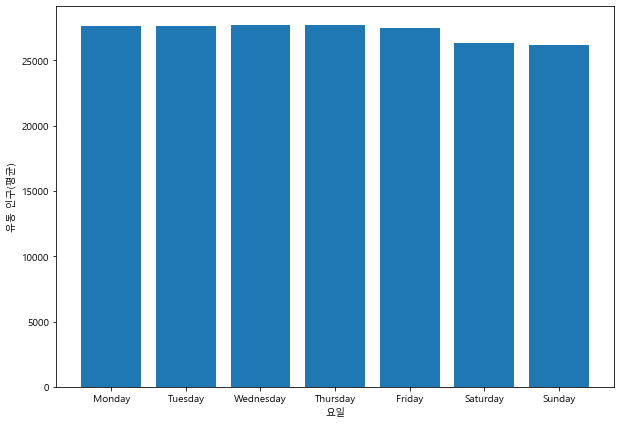

In [9]:
# 요일별 유동인구 시각화
plt.figure(figsize=(10, 7))
plt.bar(week.index, week)
plt.xlabel("요일")
plt.ylabel("유동 인구(평균)")
plt.savefig("../output/floating-3.jpg")
plt.show()

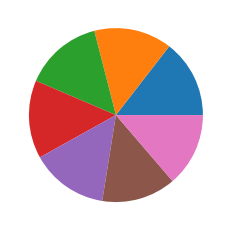

In [10]:
plt.pie(week)
plt.show()

# 시간대별 유동인구

5월부터 7월

In [11]:
df = df_all[['시간(1시간단위)', '유동인구수']]

df.columns = ['time', 'populations']
df.head()

,time,populations
0,1,12000
1,1,28680
2,1,34470
3,1,26500
4,1,24120


In [12]:
pv = df.pivot_table(index=['time'], values=['populations'])
pv

,populations
time,
0,26778.070290
1,26738.016667
2,26686.275000
3,26614.915217
4,26550.713768
5,26513.129348
6,26595.505435
7,26982.690942
8,27422.990942


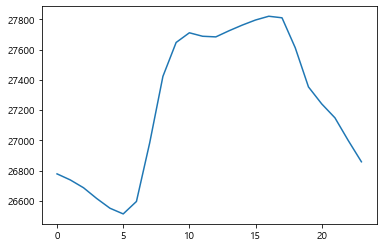

In [13]:
plt.plot(pv)

### 5월 ~ 7월까지 개별적으로

In [14]:
dff3 = df3[['시간(1시간단위)', '유동인구수']]
dff3.columns = ['time', 'populations']
pv3 = dff3.pivot_table(index=['time'], values=['populations'])

dff4 = df4[['시간(1시간단위)', '유동인구수']]
dff4.columns = ['time', 'populations']
pv4 = dff4.pivot_table(index=['time'], values=['populations'])

dff5 = df5[['시간(1시간단위)', '유동인구수']]
dff5.columns = ['time', 'populations']
pv5 = dff5.pivot_table(index=['time'], values=['populations'])

dff6 = df6[['시간(1시간단위)', '유동인구수']]
dff6.columns = ['time', 'populations']
pv6= dff6.pivot_table(index=['time'], values=['populations'])

dff7 = df7[['시간(1시간단위)', '유동인구수']]
dff7.columns = ['time', 'populations']
pv7 = dff7.pivot_table(index=['time'], values=['populations'])

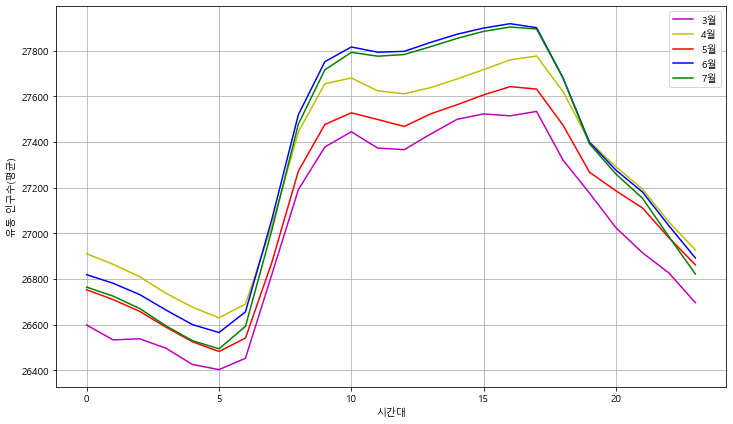

In [15]:
plt.figure(figsize=(12, 7))
plt.plot(pv3, c='m', label='3월')
plt.plot(pv4, c='y', label='4월')
plt.plot(pv5, c='r', label='5월')
plt.plot(pv6, c='b', label='6월')
plt.plot(pv7, c='g', label='7월')

plt.legend()
plt.grid()
plt.xlabel("시간대")
plt.ylabel("유동 인구수(평균)")
plt.savefig("../output/floating-4.jpg")
plt.show()

## 재생되는 시각화

In [16]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [17]:
df3 = pd.read_csv('../input/Floating_Population_2003.csv')
df4 = pd.read_csv('../input/Floating_Population_2004.csv')
df5 = pd.read_csv('../input/Floating_Population_2005.csv')
df6 = pd.read_csv('../input/Floating_Population_2006.csv')
df7 = pd.read_csv('../input/Floating_Population_2007.csv')

# df_total = pd.concat([df3, df4, df5, df6, df7])

# df = df_total[['시간(1시간단위)', '유동인구수']]
# df.columns = ['time', 'populations']
# df

In [18]:
def df_to_table(df, month):
    dff = df[['시간(1시간단위)', '유동인구수']]
    dff.columns = ['time', 'populations']

    table = dff.groupby('time')['populations'].mean()
    table = table.reset_index()
    table['month'] = month
    return table

In [19]:
# df를 table로 변환
table3 = df_to_table(df3, 3)
table4 = df_to_table(df4, 4)
table5 = df_to_table(df5, 5)
table6 = df_to_table(df6, 6)
table7 = df_to_table(df7, 7)

table = pd.concat([table3, table4, table5, table6, table7])
# table

In [20]:
fig = px.line(table, x='time', y='populations', animation_frame="month", animation_group="month", 
        color="month", range_x=[0,24], range_y=[26000,28000])
fig.show()